In [66]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [67]:
# Piecewise voltage function

xv1, yv1 = 0*3600, 205
xv2, yv2 = 1*3600, 195

mv1 = (yv2-yv1)/(xv2-xv1)

def v(t):
    if xv1 <= t and t < xv2:
        return mv1 * (t-xv1) + yv1
    elif xv2 <= t:
        return yv2
v = np.vectorize(v)

In [68]:
# Piecewise current function

xi1, yi1 = 0*3600, 100
xi2, yi2 = 1*3600, 80
xi3, yi3 = 1.8*3600, 30
xi4, yi4 = 3*3600, 0

mi1 = (yi2-yi1)/(xi2-xi1)
mi2 = (yi3-yi2)/(xi3-xi2)
mi3 = (yi4-yi3)/(xi4-xi3)

def i(t):
    if xi1 <= t and t < xi2:
        return mi1 * (t-xi1) + yi1
    elif xi2 <= t and t < xi3:
        return mi2 * (t-xi2) + yi2
    elif xi3 <= t < xi4:
        return mi3 * (t-xi3) + yi3
    elif xi4 <= t:
        return 0
i = np.vectorize(i)

In [69]:
time = np.linspace(0*3600, 3*3600, 500)

voltage = v(time)
current = i(time)
power = current * voltage
energy = scipy.integrate.cumulative_trapezoid(power, x=time, initial=0)

Text(0.5, 1.0, 'Voltage vs. Time')

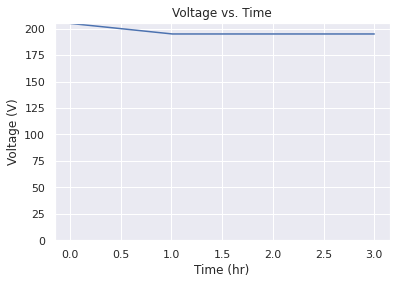

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time/3600, voltage)

ax.set_ylim(bottom=0)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Voltage vs. Time")

Text(0.5, 1.0, 'Current vs. Time')

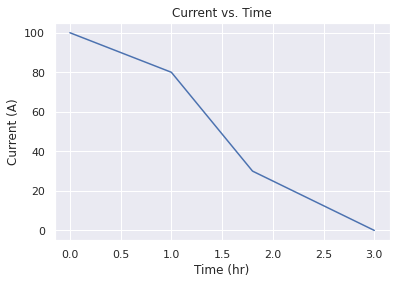

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time/3600, current)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Current (A)")
ax.set_title("Current vs. Time")

Text(0.5, 1.0, 'Power vs. Time')

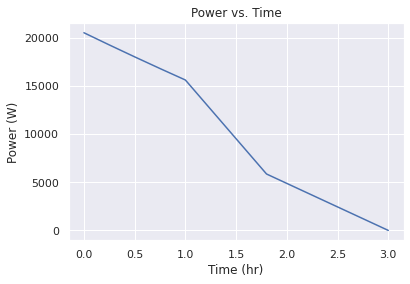

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time/3600, power)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Power (W)")
ax.set_title("Power vs. Time")

Text(0.5, 1.0, 'Energy Consumed vs. Time')

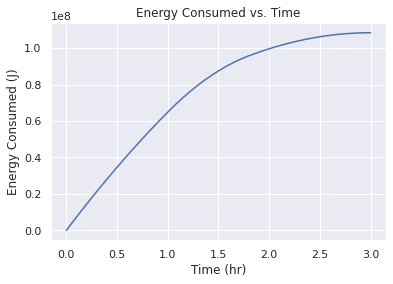

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time/3600, energy)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Energy Consumed (J)")
ax.set_title("Energy Consumed vs. Time")

Assuming battery is from a first-generation Nissan Leaf

In [98]:
capacity_kWh = 25  # kWh
# Calculate capacity in Joules
capacity_J = capacity_kWh * 1000 * 3600

Assuming initial SOC of 100%

In [99]:
SOC_ti = 1.00
SOC_tf = 0.30
# Change in state of charge
delta_SOC = SOC_ti - SOC_tf

Convert vehicle speed from kilometers per hour to miles per second

In [100]:
velocity_km_per_h = 100  # km/h
velocity_mi_per_s = velocity_km_per_h * 0.621371 / 3600

Calculate range (energy consumed = energy available)

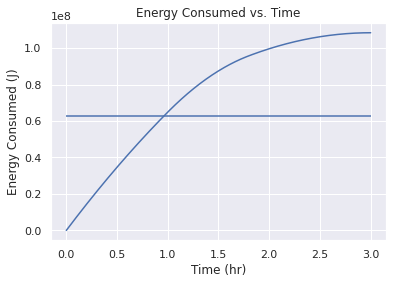

In [101]:
energy_available = delta_SOC * capacity_J  # Available remaining energy

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time/3600, energy)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Energy Consumed (J)")
ax.set_title("Energy Consumed vs. Time")
ax.hlines(energy_available, xmin=0, xmax=3)

Calculate time to battery depletion in hours

In [102]:
hr = (time/3600).tolist()
en = energy.tolist()

for h, e in zip(hr, en):
    if e <= energy_available:
        # Get last item where energy depleted is less than energy available
        hrs_to_depletion = h

print(f"{hrs_to_depletion:.04f} hours to depletion")

0.9619 hours to depletion


Calculate range in kilometers

In [103]:
range_km = velocity_km_per_h * hrs_to_depletion

print(f"{range_km:.02f} km to depletion")

96.19 km to depletion
